In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import S, symbols, printing
import scipy.optimize as sci
import pandas as pd
from pathlib import Path

# Data acquisition
#•   Different methods for data wrangling:
#1. 	Merge datasets
#2. 	Identify unique values
#3. 	Drop unnecessary columns
#4. 	Check the dimensions of the dataset
#5. 	Check the datatype of the dataset
#6. 	Check datatype summary
#7. 	Treat missing values
#8. 	Validate the correctness of the data at the primary level if applicable


In [5]:
dataset_1 = pd.read_csv("dataset_1.csv")


df=pd.read_csv("dataset_1.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,0,1,11,False,5,3,0.18
606,607,28-01-2011,1,0,1,12,False,5,3,0.18
607,608,28-01-2011,1,0,1,13,False,5,3,0.18
608,609,28-01-2011,1,0,1,14,False,5,3,0.22


In [29]:
dataset_1["season"].unique()

array([1], dtype=int64)

In [30]:
dataset_1.shape

(610, 10)

In [31]:
dataset_1.shape[0]# for only no.rows

610

In [32]:
dataset_1.shape[1]# only for checkinh column

10

In [34]:
dataset_1["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [6]:
dataset_1.info() # for summury check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     610 non-null    int64  
 1   dteday      610 non-null    object 
 2   season      610 non-null    int64  
 3   yr          610 non-null    int64  
 4   mnth        610 non-null    int64  
 5   hr          610 non-null    int64  
 6   holiday     610 non-null    bool   
 7   weekday     610 non-null    int64  
 8   weathersit  610 non-null    int64  
 9   temp        610 non-null    float64
dtypes: bool(1), float64(1), int64(7), object(1)
memory usage: 43.6+ KB


In [13]:
df = pd.DataFrame(dataset_1)
df
# for checking null values

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,0,1,11,False,5,3,0.18
606,607,28-01-2011,1,0,1,12,False,5,3,0.18
607,608,28-01-2011,1,0,1,13,False,5,3,0.18
608,609,28-01-2011,1,0,1,14,False,5,3,0.22


In [64]:

df.isnull().sum()
# checking missing values

Unnamed: 0    0
instant       0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [20]:
if dataset_1 is not None:
    print("Variable is not None")
else:
    print("Variable is None")


Variable is not None


In [21]:
dataset_2 = pd.read_csv("dataset_2.csv")

df=pd.read_csv("dataset_2.csv")
df

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0000,3,13,16
1,1,2,0.2727,0.80,0.0000,8,32,40
2,2,3,0.2727,0.80,0.0000,5,27,32
3,3,4,0.2879,0.75,0.0000,3,10,13
4,4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...
605,605,606,0.2121,0.93,0.1045,0,30,30
606,606,607,0.2121,0.93,0.1045,1,28,29
607,607,608,0.2121,0.93,0.1045,0,31,31
608,608,609,0.2727,0.80,0.0000,2,36,38


In [53]:
dataset_2.drop(["Unnamed: 0"],axis=1)

,instant,atemp,hum,windspeed,casual,registered,cnt
0,1,0.2879,0.81,0.0000,3,13,16
1,2,0.2727,0.80,0.0000,8,32,40
2,3,0.2727,0.80,0.0000,5,27,32
3,4,0.2879,0.75,0.0000,3,10,13
4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...
605,606,0.2121,0.93,0.1045,0,30,30
606,607,0.2121,0.93,0.1045,1,28,29
607,608,0.2121,0.93,0.1045,0,31,31
608,609,0.2727,0.80,0.0000,2,36,38


In [55]:
dataset_2["atemp"].median()# defining median for perticular column

0.197

In [25]:
dataset_2.shape

(610, 8)

In [26]:
dataset_2.shape[0]# for only no.rows

610

In [27]:
dataset_2.shape[1]# for only no.column

8

In [28]:
dataset_2.info() # for summury check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  610 non-null    int64  
 1   instant     610 non-null    int64  
 2   atemp       599 non-null    float64
 3   hum         610 non-null    float64
 4   windspeed   610 non-null    float64
 5   casual      610 non-null    int64  
 6   registered  610 non-null    int64  
 7   cnt         610 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 38.2 KB


In [29]:
df = pd.DataFrame(dataset_2)
df

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0000,3,13,16
1,1,2,0.2727,0.80,0.0000,8,32,40
2,2,3,0.2727,0.80,0.0000,5,27,32
3,3,4,0.2879,0.75,0.0000,3,10,13
4,4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...
605,605,606,0.2121,0.93,0.1045,0,30,30
606,606,607,0.2121,0.93,0.1045,1,28,29
607,607,608,0.2121,0.93,0.1045,0,31,31
608,608,609,0.2727,0.80,0.0000,2,36,38


In [46]:
df.isnull().sum()  #finding null values

Unnamed: 0     0
instant        0
atemp         11
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64

In [60]:
atemp = 0  # replacing null values
df.fillna(value=atemp, inplace=True)


In [61]:
df.isnull().sum()

Unnamed: 0    0
instant       0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [57]:
if dataset_2 is not None:
    print("Variable is not None")
else:
    print("Variable is None")

Variable is not None


# combining dataset_1 & dataset_2

In [50]:
df1 = pd.DataFrame(dataset_1)
df2 = pd.DataFrame(dataset_2)
result = pd.concat([df1, df2], ignore_index=True)
result

C:\Users\Angad_shah\anaconda3\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Angad_shah\anaconda3\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,Unnamed: 0,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1.0,0.0,1.0,0.0,False,6.0,1.0,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,01-01-2011,1.0,0.0,1.0,1.0,False,6.0,1.0,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,01-01-2011,1.0,0.0,1.0,2.0,False,6.0,1.0,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,01-01-2011,1.0,0.0,1.0,3.0,False,6.0,1.0,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,01-01-2011,1.0,0.0,1.0,4.0,False,6.0,1.0,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.0,0.2121,0.93,0.1045,0.0,30.0,30.0
1216,607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606.0,0.2121,0.93,0.1045,1.0,28.0,29.0
1217,608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,607.0,0.2121,0.93,0.1045,0.0,31.0,31.0
1218,609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,608.0,0.2727,0.80,0.0000,2.0,36.0,38.0


In [52]:
pd.get_dummies(df, columns = ['atemp', 'windspeed','casual', 'registered' , 'hum'])


,Unnamed: 0,instant,cnt,atemp_0.0,atemp_0.0152,atemp_0.0303,atemp_0.0455,atemp_0.0606,atemp_0.0758,atemp_0.0909,...,hum_0.8,hum_0.81,hum_0.82,hum_0.86,hum_0.87,hum_0.88,hum_0.92,hum_0.93,hum_0.94,hum_1.0
0,0,1,16,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,2,40,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,3,32,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3,4,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,605,606,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
606,606,607,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
607,607,608,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
608,608,609,38,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [49]:
data_mean = np.mean
data_mean(dataset_1)

C:\Users\Angad_shah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Angad_shah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


instant       305.500000
season          1.000000
yr              0.000000
mnth            1.000000
hr             11.795082
holiday         0.039344
weekday         2.977049
weathersit      1.477049
temp            0.196885
dtype: float64

#  checking outliers

<Axes: >

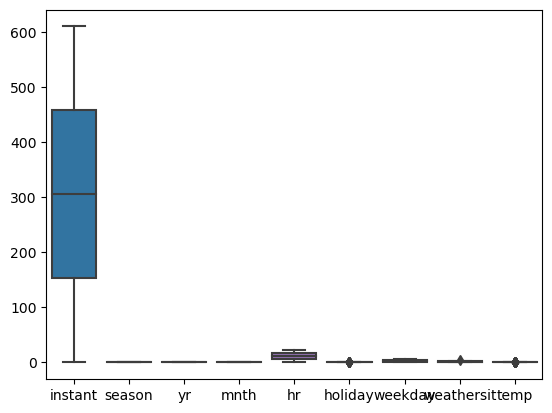

In [79]:
import statistics
import seaborn as sns


column_name = dataset_1
df_dataset_1 = pd.DataFrame(dataset_1)
df_dataset_1
#print(df_dataset_1head())


sns.boxplot(df_dataset_1)


# removing outliers


<Axes: >

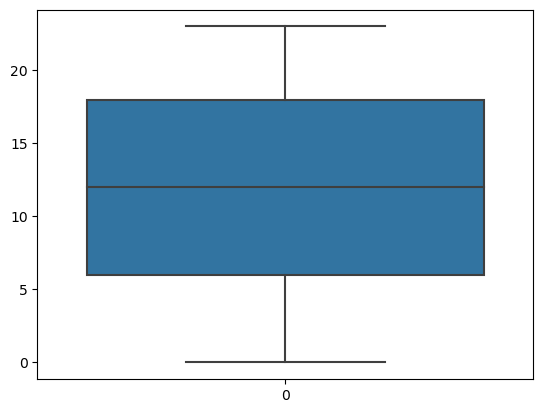

In [81]:
sns.boxplot(df_dataset_1['hr'])


In [111]:
from scipy.stats import skew

df = pd.DataFrame(result)
#print (skew(df1, axis = 1))

#df = pd.DataFrame(df1,df2)



#df
#skewness_value = skew(result, axis=0, bias=True)


In [80]:
df=pd.read_csv("dataset_3.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,29-01-2011,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,28-01-2011,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,28-01-2011,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,28-01-2011,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [84]:
from scipy.stats import skew
skewness_value = skew(dataset_3, axis=0, bias=True)

NameError: name 'dataset_3' is not defined

In [ ]:
_1